<a href="https://colab.research.google.com/github/jasim-1863/SDCProjects/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9000
Confusion Matrix:
[[97  7]
 [13 83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



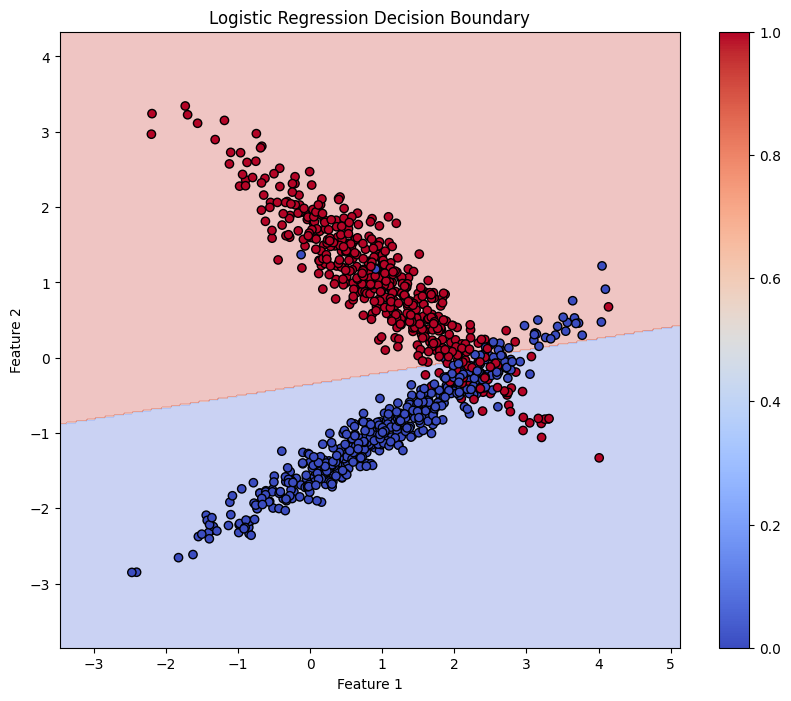


Manual Implementation:
Accuracy: 0.9000
Confusion Matrix:
[[97  7]
 [13 83]]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot decision boundary
def plot_decision_boundary(X, y, model, scaler):
    # Define mesh grid
    h = 0.02  # Step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Scale mesh points
    mesh_points = scaler.transform(np.c_[xx.ravel(), yy.ravel()])

    # Predict class labels for mesh points
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and scatter plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.colorbar()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, model, scaler)

# Manual implementation of Logistic Regression
class ManualLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

# Test the manual implementation
manual_model = ManualLogisticRegression(learning_rate=0.1, n_iterations=1000)
manual_model.fit(X_train_scaled, y_train)
manual_predictions = manual_model.predict(X_test_scaled)

print("\nManual Implementation:")
print(f"Accuracy: {accuracy_score(y_test, manual_predictions):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, manual_predictions))